In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

#Extracting the dataset from the source (e.g., CSV file)
df = pd.read_csv('SQL_capstone_part1.csv')

# Display first few rows
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Display all the column names
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df.shape

(1470, 35)

In [5]:
#The target calumn is Attrition. So, lets check the unique values in the target variable.
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

##The features like worklifebalance, RelationshipSatisfaction, TotalWorkingYears, Yearssincelastpromotion, Percentagesalaryhike are some of the features that can influence the target variable Atttrition.


In [6]:
#looking for null values
df.isnull().sum()


,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


There are no null values in the dataset.

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
# Extractign all the categorical columns to transofrm them
categoical_columns = df.select_dtypes(include=['object'])
columns_list = categoical_columns.columns.tolist()

In [10]:
print(columns_list)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [11]:
non_categorical = df.drop(columns=columns_list)
print(non_categorical.shape)

(1470, 26)


In [12]:
for col in non_categorical.columns.tolist():
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [13]:
non_categorical = df.drop(columns=columns_list)
print(non_categorical.shape)

(699, 26)


The shape of the non categorical columns is different before and after the outliers eliminations. So that means there are outliers and they are eliminated.

In [14]:
#Encoding all the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in columns_list:
    df[col] = le.fit_transform(df[col])

# One-hot encoding for other categorical columns
#df = pd.get_dummies(df, columns=[col for col in cat_cols if col not in binary_cols], drop_first=True)

In [15]:
df[columns_list]

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
2,1,2,1,4,1,2,2,0,1
3,0,1,1,1,0,6,1,0,1
5,0,1,1,1,1,2,2,0,0
11,0,2,1,1,0,2,2,0,1
12,0,2,1,1,1,6,0,0,0
...,...,...,...,...,...,...,...,...,...
1463,0,0,1,3,1,4,2,0,0
1464,0,2,2,4,0,8,2,0,0
1465,0,1,1,3,1,2,1,0,0
1468,0,1,2,3,1,7,1,0,0


Now all the categorical columns are passed throught the label encoding where each category is given one number as the identifation for the category.

##Featuring Engineerinf and EDA

In [16]:
#Creating new feature for the age at which the employee joined the company
df['Age_at_joining'] = df['Age'] - df['YearsAtCompany']

##Data Exploration

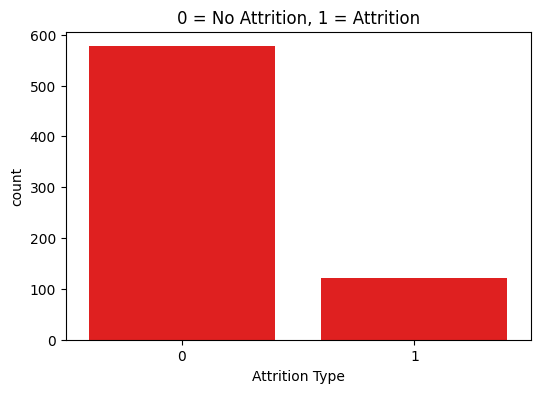

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df, color='red')
plt.title("0 = No Attrition, 1 = Attrition")
plt.xlabel("Attrition Type")
plt.show()

In this analysis 0 means no attrition and 1 means attrition. So we have a lot of no attrition data.

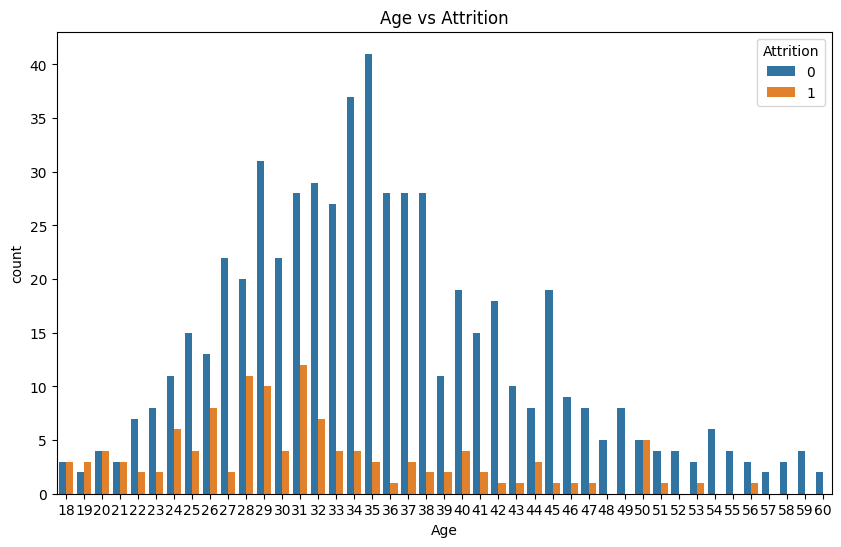

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(x='Age', hue='Attrition', data=df)
plt.title("Age vs Attrition")
plt.show()

If observed in th plot Age vs Attrition. We can see all the employee ages working and alln the age groups the number of no attrition is less than attrition that means the employees leaving the company is very less.

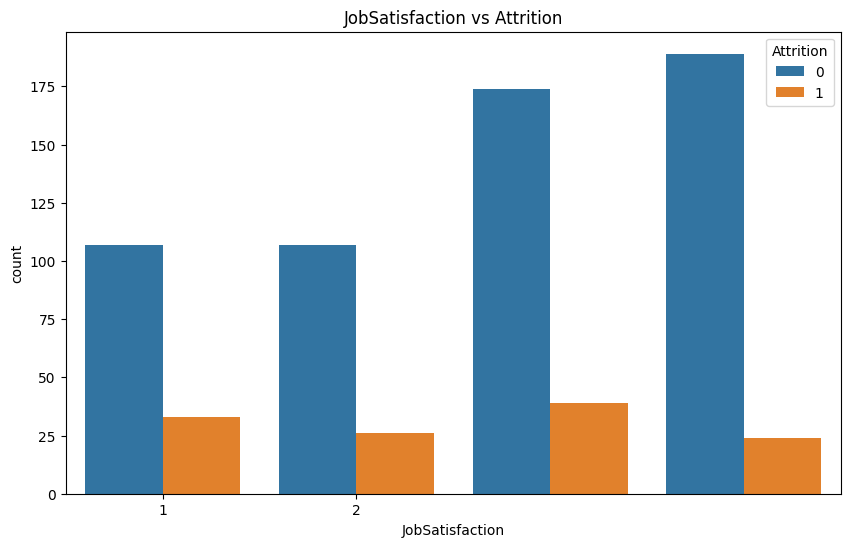

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title("JobSatisfaction vs Attrition")
plt.xticks([0, 1])
plt.show()

Coming to the job satisfaction vs attrition. So we have 4 different job satisfaction levels if tthe job satisfaction is less the employees didnt leave the company for various reasons. The number of no attrition is highe than the attrition.

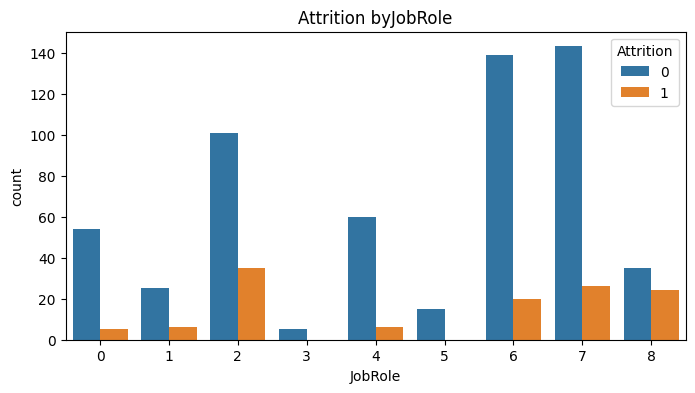

In [33]:
plt.figure(figsize=(8,4))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.title("Attrition byJobRole")
plt.show()

Looking at the jobrole vs attrition. The no attrition is higher than attrition in all the job roles . In job role 8 thee are slightly close. For job roles names in detilas look for data before encoding.

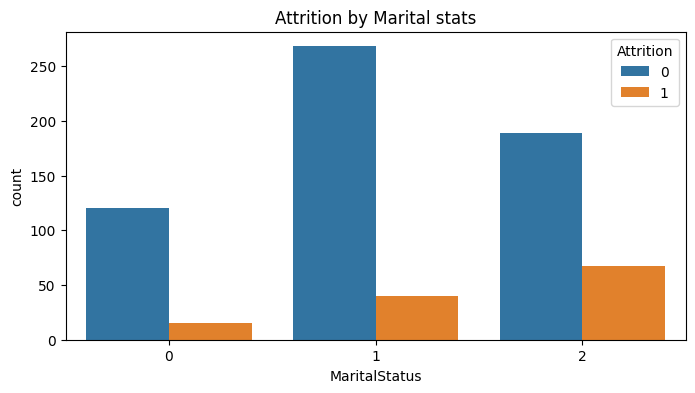

In [29]:
plt.figure(figsize=(8,4))
sns.countplot(x='MaritalStatus', hue='Attrition', data=df)
plt.title("Attrition by Marital stats")
plt.show()

Marital Status also didnt influence the attrition rate as the no attrition is higher for all the marital status.

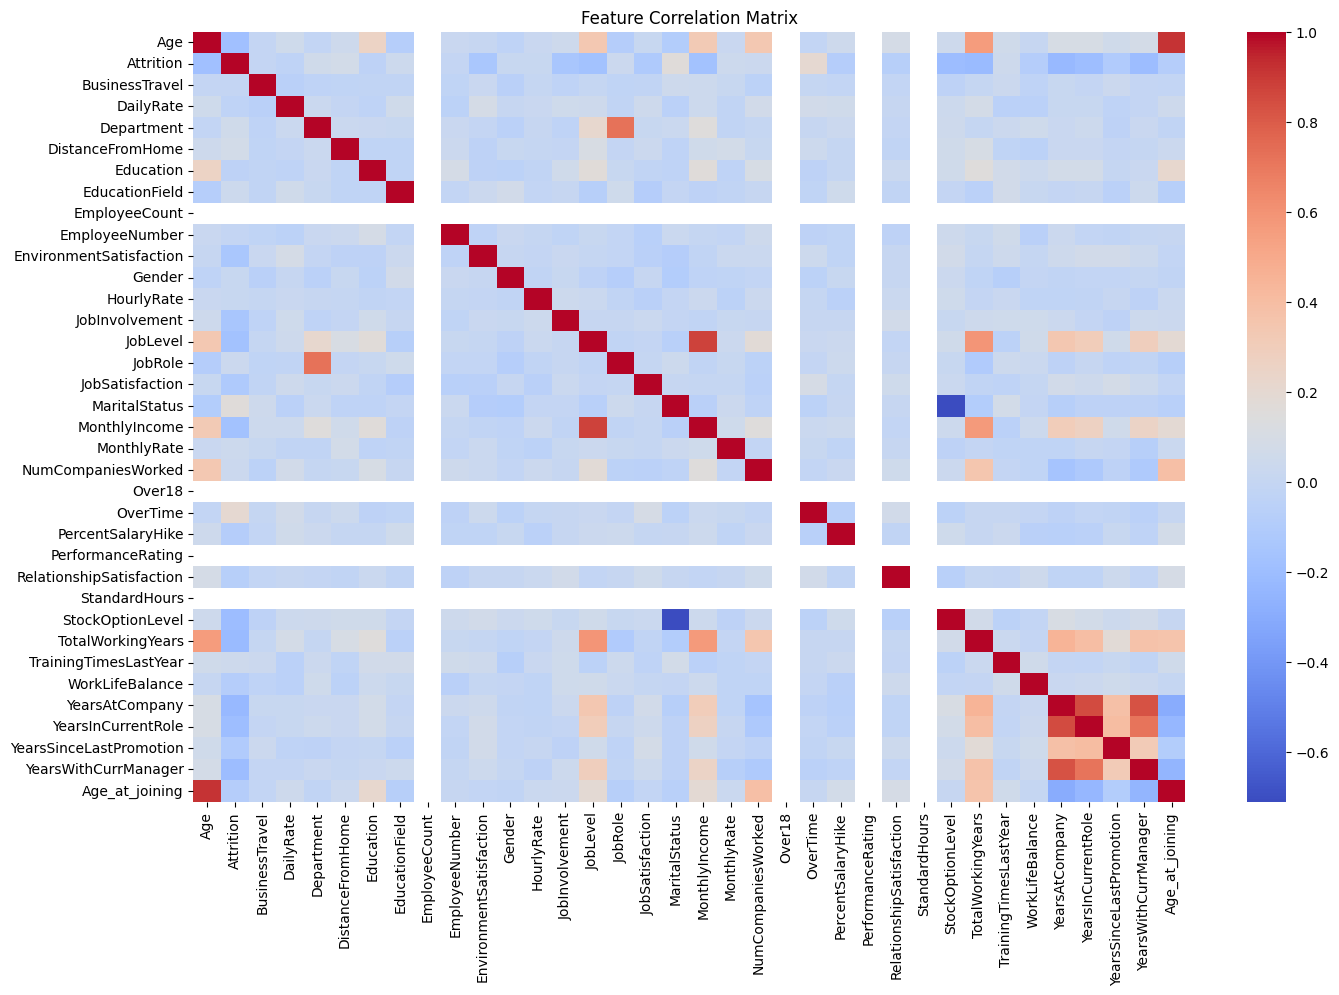

In [32]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

If you look at the heatmap. Teh corellation with all the features fo the attrition feature is less.So, there is no potention dependency of any feature for attrition rates.